# KMeans 

Practically how do you know what value to choose for k?

The two step summary is:
- Create clusters form sklearn
- Plot knee curve showing the Within-Cluster-Sum of Squared Errors (WSS) for different values of k

- See:
[How to Determine the Optimal K for K-Means? by Khyati Mahendru](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

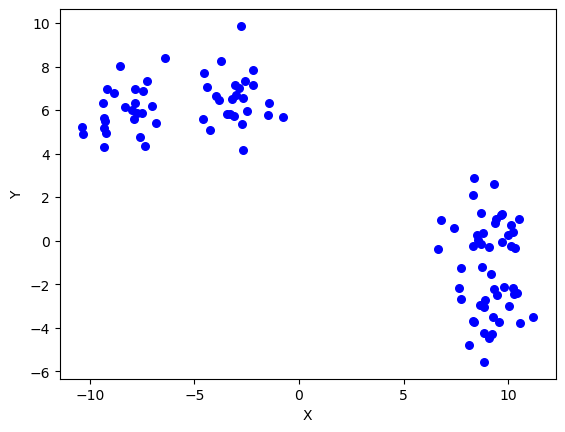

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
 
# make_blobs() generate sample points around c centers (randomly chosen)
X, y = make_blobs(n_samples = 100, centers = 4, 
                cluster_std = 1, n_features = 2)
                 
plt.scatter(X[:, 0], X[:, 1], s = 30, color ='b')
 
# label the axes
plt.xlabel('X')
plt.ylabel('Y')
 
plt.show()
plt.clf() # clear the figure

# Find the knee

Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as a knee.
What do we mean by Within-Cluster-Sum of Squared Errors:

The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
The WSS score is the sum of these Squared Errors for all the points.

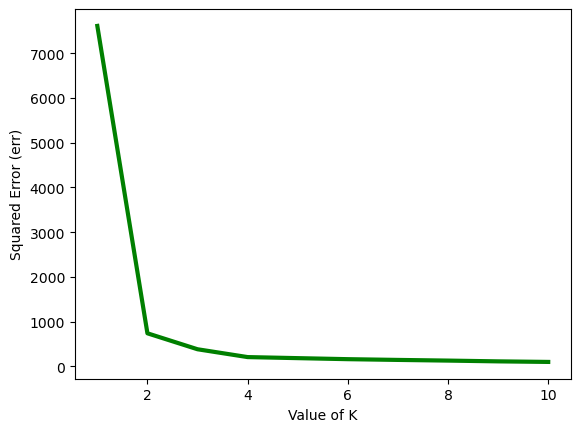

In [2]:
err =[]
for i in range(1, 11):
	KM = KMeans(n_clusters = i, max_iter = 500, n_init=10)
	KM.fit(X)
	
	# calculates squared error
	# for the clustered points
	err.append(KM.inertia_)	 

# plot the err against K values
plt.plot(range(1, 11), err, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (err)")
plt.show() # clear the plot

# the point of the elbow is the 
# most optimal value for choosing k


# Silhouette method as confirmation

[Silhouette method Wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=Silhouette%20refers%20to%20a%20method,statistician%20Peter%20Rousseeuw%20in%201987)

"Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.[1] It was proposed by Belgian statistician Peter Rousseeuw in 1987"

"The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distanc"e.

In [3]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, n_init=10).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

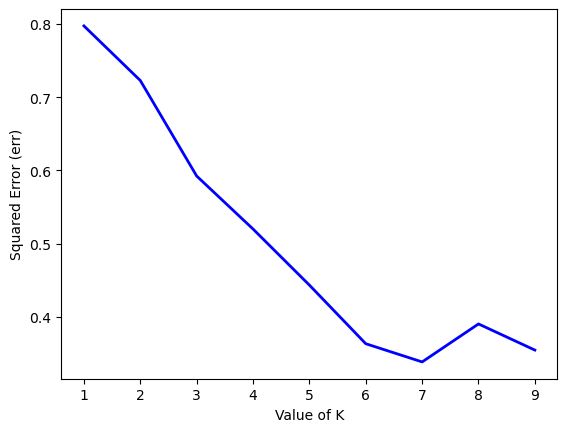

In [4]:
plt.plot(range(1, kmax), sil, color ='b', linewidth ='2')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (err)")
plt.show() # clear the plot

array([0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2,
       0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2,
       0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0], dtype=int32)

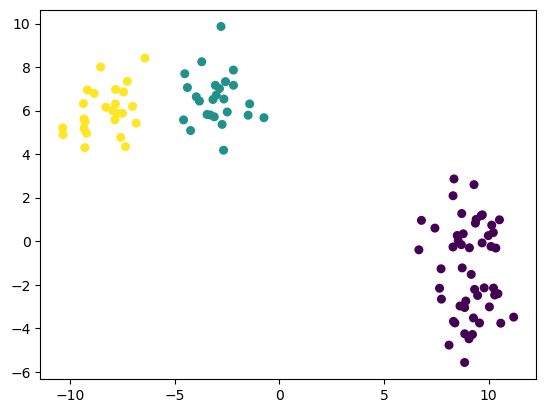

In [7]:
KM = KMeans(n_clusters = 3, max_iter = 500, n_init=10)
KM.fit(X)
plt.scatter(X[:, 0], X[:, 1], s = 30, c =KM.labels_)
KM.labels_